In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
path.ls()

(#3) [Path('C:/Users/YES/.fastai/data/mnist_sample/labels.csv'),Path('C:/Users/YES/.fastai/data/mnist_sample/train'),Path('C:/Users/YES/.fastai/data/mnist_sample/valid')]

In [4]:
(path/"train").ls()

(#2) [Path('C:/Users/YES/.fastai/data/mnist_sample/train/3'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/7')]

In [5]:
threes = (path/"train"/"3").ls().sorted()

In [6]:
sevens = (path/"train"/"7").ls().sorted()

In [7]:
threes

(#6131) [Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10000.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10011.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10031.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10034.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10042.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10052.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/1007.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10074.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10091.png')...]

In [8]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [9]:
array(im3)[4:10, 4:10] # numpy

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [10]:
tensor(im3)[4:10, 4:10] # tensor

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [11]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{"font-size": "6pt"}).background_gradient("Greys")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [12]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

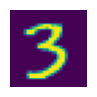

In [13]:
show_image(three_tensors[1])

In [14]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [15]:
len(stacked_threes.shape)

3

In [16]:
stacked_threes.ndim

3

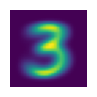

In [17]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

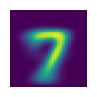

In [18]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

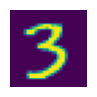

In [19]:
a_3 = stacked_threes[1]
show_image(a_3);

In [20]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [21]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [22]:
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [23]:
data = [[1, 2, 3], [4, 5, 6]]
arr = array(data)
tns = tensor(data)

print(arr) # 넘파이
print(tns) # 파이토치

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]])


In [24]:
tns[1]

tensor([4, 5, 6])

In [25]:
tns[:,1]

tensor([2, 5])

In [26]:
tns[1, 1:3]

tensor([5, 6])

In [27]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [28]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [29]:
tns.type()

'torch.LongTensor'

In [30]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [31]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/"valid"/"3").ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/"valid"/"7").ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [32]:
def mnist_distance(a,b) : return (a-b).abs().mean((-1, -2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [33]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In [34]:
tensor([1, 2, 3]) + tensor(1)

tensor([2, 3, 4])

In [35]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [36]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [37]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [38]:
is_3(valid_3_tens)

tensor([ True,  True,  True,  ..., False,  True,  True])

In [39]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1-is_3(valid_7_tens).float()).mean()
accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [40]:
xt = tensor(3.).requires_grad_()

In [42]:
def f(x):
    return (x**2).sum()
yt = f(xt)

In [43]:
yt

tensor(9., grad_fn=<SumBackward0>)

In [44]:
yt.backward()

In [45]:
xt.grad

tensor(6.)

In [46]:
xt = tensor([3., 4., 10.]).requires_grad_()

In [47]:
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x) : return (x**2).sum()
yt = f(xt)
yt

In [48]:
yt.backward()
xt.grad

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [49]:
time = torch.arange(0, 20).float();
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

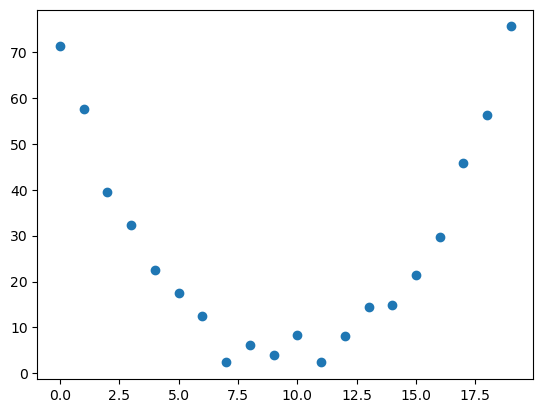

In [51]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed);

In [52]:
def f(t, params):
    a, b, c = params
    return a*(t**2) + (b*t)+c

In [54]:
def mse(preds, targets):
    return ((preds-targets)**2).mean()

In [55]:
params = torch.randn(3).requires_grad_()

In [56]:
preds = f(time, params)

In [57]:
def show_preds(preds, ax=None):
    if ax is None: 
        ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color="red")
    ax.set_ylim(-300, 100)

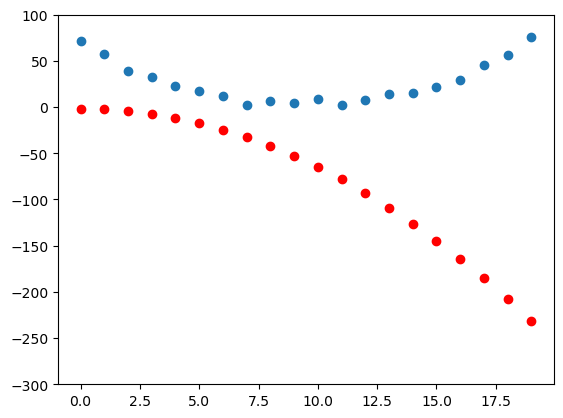

In [58]:
show_preds(preds)

In [59]:
loss = mse(preds, speed)
loss

tensor(18107.8613, grad_fn=<MeanBackward0>)

In [60]:
loss.backward()
params.grad

tensor([-44275.0742,  -2844.1104,   -214.2060])

In [61]:
params.grad*1e-5

tensor([-0.4428, -0.0284, -0.0021])

In [62]:
params

tensor([-0.6384,  0.0498, -1.5854], requires_grad=True)

In [63]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [64]:
preds = f(time, params)
mse(preds, speed)

tensor(3984.4062, grad_fn=<MeanBackward0>)

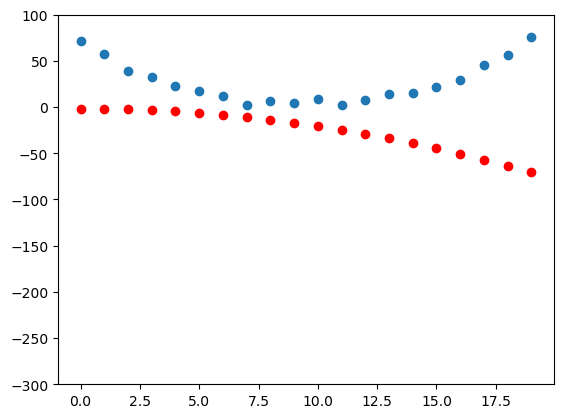

In [65]:
show_preds(preds)

In [66]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [67]:
for i in range(10): apply_step(params)

3984.40625
1311.8157958984375
806.0767822265625
710.3721923828125
692.2587280273438
688.8280639648438
688.1756591796875
688.0489501953125
688.021728515625
688.013427734375


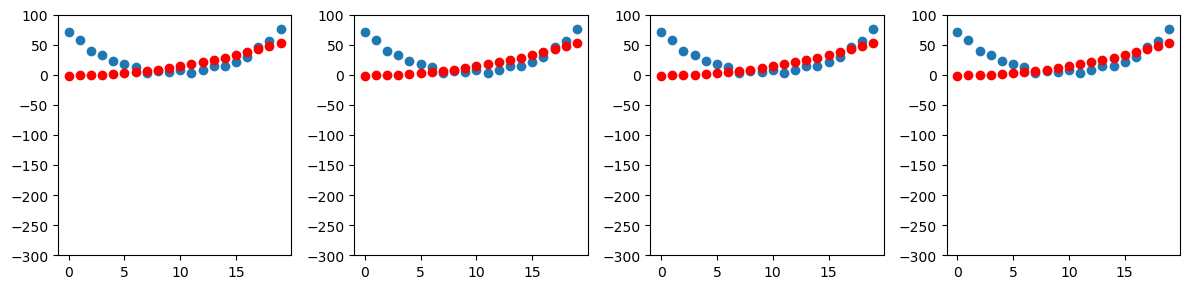

In [68]:
_, axs = plt.subplots(1, 4, figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [69]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [70]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [71]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [72]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [73]:
def init_params(size, std=1.0): 
    return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28, 1))

In [74]:
bias = init_params(1)

In [75]:
(train_x[0]*weights.T).sum() + bias

tensor([11.8788], grad_fn=<AddBackward0>)

In [76]:
def linear1(xb): 
    return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[11.8788],
        [15.2477],
        [ 3.7072],
        ...,
        [10.1876],
        [10.2442],
        [12.5969]], grad_fn=<AddBackward0>)

In [81]:
corrects = (preds>0.5).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [82]:
corrects.float().mean().item()

0.5848661065101624

In [83]:
with torch.no_grad():
    weights[0] *= 1.001

In [84]:
preds = linear1(train_x)
((preds>0.5).float() == train_y).float().mean().item()

0.5848661065101624

In [85]:
trgts = tensor([1, 0, 1])

In [86]:
prds = tensor([0.9, 0.4, 0.2])

In [87]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [88]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [90]:
mnist_loss(prds, trgts)

tensor(0.4333)

In [91]:
mnist_loss(tensor([0.9, 0.4, 0.8]), trgts)

tensor(0.2333)

In [93]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

In [99]:
!pip install fastbook

     -------------------------------------- 719.8/719.8 kB 7.5 MB/s eta 0:00:00
     ------------------------------------- 977.5/977.5 kB 30.2 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
     ------------------------------------- 474.6/474.6 kB 31.0 MB/s eta 0:00:00
     ---------------------------------------- 134.3/134.3 kB ? eta 0:00:00
     --------------------------------------- 21.5/21.5 MB 36.4 MB/s eta 0:00:00
     ---------------------------------------- 224.5/224.5 kB ? eta 0:00:00
     ---------------------------------------- 319.8/319.8 kB ? eta 0:00:00
     ---------------------------------------- 61.0/61.0 kB ? eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.10.1
    Uninstalling huggingface-hub-0.10.1:
      Successfully uninstalled huggingface-hub-0.10.1


In [101]:
import fastbook
fastbook.setup_book()
from fastbook import *

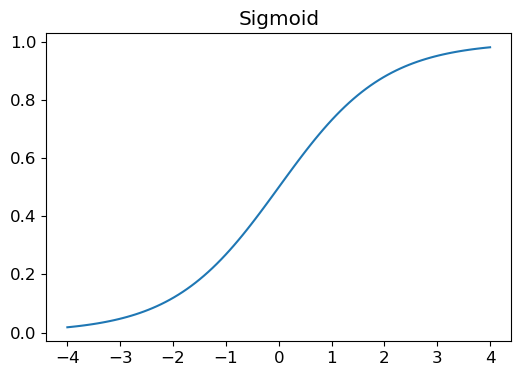

In [102]:
plot_function(torch.sigmoid, title="Sigmoid", min=-4, max=4)

In [103]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [104]:
coll = range(15) 
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [106]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [107]:
dl = DataLoader(ds, batch_size=6, shuffle=True)

In [108]:
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

In [110]:
weights = init_params((28*28, 1))
bias = init_params(1)

In [111]:
dl = DataLoader(dset, batch_size = 256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [112]:
valid_dl = DataLoader(valid_dset, batch_size = 256)

In [113]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [114]:
preds = linear1(batch)
preds

tensor([[ 4.5118],
        [ 3.6536],
        [11.2975],
        [14.1164]], grad_fn=<AddBackward0>)

In [115]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.0090, grad_fn=<MeanBackward0>)

In [116]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0013), tensor([-0.0088]))

In [118]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [119]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0025), tensor([-0.0177]))

In [120]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0038), tensor([-0.0265]))

In [121]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [123]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grab(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [126]:
(preds>0.5).float() == train_y[:4]

tensor([[True],
        [True],
        [True],
        [True]])